# New calibrator algorithm

This tests out the new calibrator detection algorithm with proper timing and everything.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import lusee
import sys, os
from scipy.interpolate import interp1d
sys.path.append('/home/anze/work/lusee/notebooks/calibrator')
os.environ['LUSEE_DRIVE_DIR']='/home/anze/work/lusee/Drive/'
from algorithms import  Comb, Calibrator

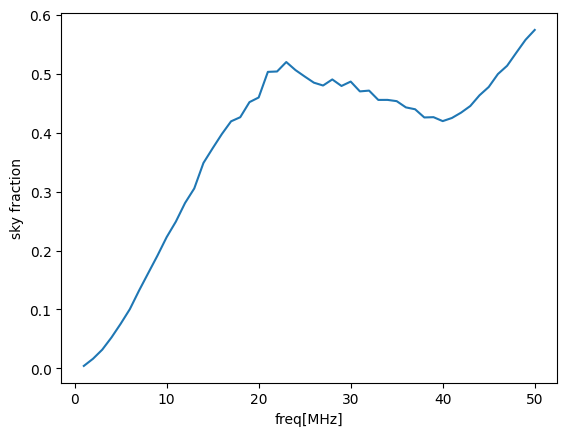

In [2]:
B=lusee.Beam()
plt.plot(B.freq,B.sky_fraction())
plt.xlabel('freq[MHz]')
plt.ylabel('sky fraction')
sky_fraction = interp1d(B.freq,B.sky_fraction(),kind='linear')




Text(0, 0.5, 'sky brightness [W/m^2/Hz/sr]')

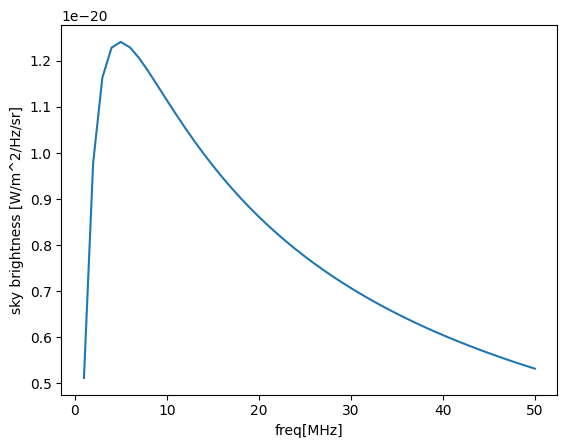

In [3]:
plt.plot(B.freq,lusee.MonoSkyModels.B_NB(B.freq))
plt.xlabel('freq[MHz]')
plt.ylabel('sky brightness [W/m^2/Hz/sr]')

Power per tone 9.999999999999999e-19 W/m^2


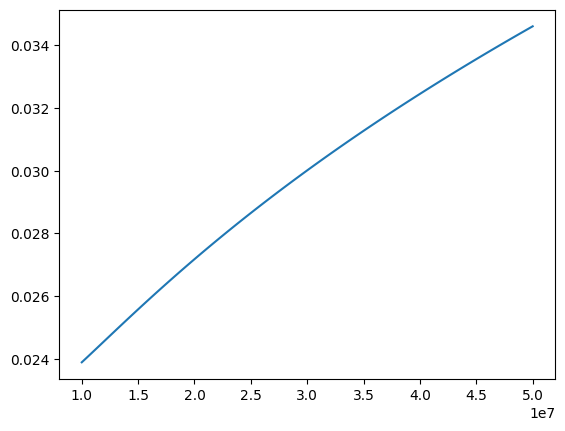

In [99]:
# define signal and sky signals
req_level = 10e-24 * 100e3 ## Appendix A requirement W/m^2 /Hz * 100kHz

print ("Power per tone",req_level,'W/m^2')

def signal_rms(freq):
    freq_MHz = freq/1e6
    sf = sky_fraction(freq_MHz)
    return np.sqrt(req_level*sf)

def noise_rms(freq):
    freq_MHz = freq/1e6
    channel_width = 25e3 ## 25kHz primary channelization
    sf = sky_fraction(freq_MHz)
    sky_area = 2*np.pi
    sky_signal =  lusee.MonoSkyModels.B_NB(freq_MHz)*sf*channel_width*sky_area
    return np.sqrt(sky_signal)

freq=np.linspace(10e6,50e6,100)
plt.plot(freq,signal_rms(freq)/noise_rms(freq))
#plt.plot(freq,noise(freq))

In [109]:
comb=Comb(Nstart= 181, Nend= 983, response=signal_rms, noise=noise_rms,pilot_idx=[300],pilot_boost=15)
C = Calibrator(comb, alpha=-0.3,dalpha_dt=0.0, add_noise=True, Nnotch=16, Nintg=64)
#C.produce_data_block()[:,0]
res = C.analyze_data(alpha_start=-0.3,tmax=3,force_detect=True)
res['detect'], res['SNRdBdet']

pilot_boost 15
non_pilot_boost 0.6633249580710799
3.3095335903647925e-10 -6.986170167272215e-05 True
-1.1504345972668074e-10 -8.943100488193118e-05 True
-3.6979087697968706e-10 -8.887550041218969e-05 True
3.8629397292485214e-10 -8.085294675044734e-05 True
-7.426497351971004e-11 -7.292971905226831e-05 True
-6.723502608356878e-11 -8.356137605225857e-05 True
-1.8081842404604446e-10 -6.697491326902228e-05 True
-1.028673279485708e-10 -9.437424267442194e-05 True
4.290876317932463e-10 -8.32525517354031e-05 True
-8.488197044605777e-11 -7.574346748896423e-05 True
-1.943970210296176e-10 -9.90291546261592e-05 True
2.755788647168009e-10 -8.075387557553569e-05 True
-2.3251931316489786e-10 -8.659018780161486e-05 True
2.786049303578378e-10 -7.262761423194506e-05 True
-6.318677218644688e-10 -9.042604744468371e-05 True
-1.6796250569653209e-10 -7.64519202969706e-05 True
1.3534423381961072e-10 -7.83494843515698e-05 True
1.937048573175402e-11 -7.374925674067504e-05 True
-2.805312249041536e-10 -7.264596426

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 array([2.38827031, 2.60698736, 2.8464959 , 2.79005676, 2.39157066,
        2.66572272, 2.57647545, 3.34042447, 2.97392262, 2.91170271,
        2.97076101, 2.96791117, 2.77308716, 2.75257717, 2.96370459,
        2.58501917, 2.78034238, 2.85882242, 3.0660811 , 3.01855683,
        3.06402327, 2.71685307, 2.87923187, 2.71227859, 2.39585875,
        2.43426889, 2.58626828, 2.30295942, 2.55793157, 2.67760016,
       

rms= 0.0151601345811594


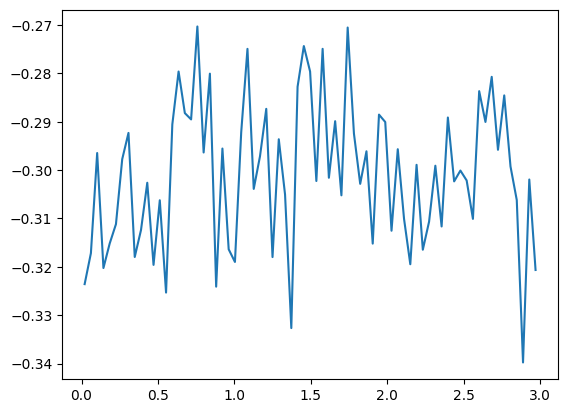

In [110]:
plt.plot(res['t'], res['alphadet'])

print('rms=',res['alphadet'].std())

In [113]:
comb=Comb(Nstart= 181, Nend= 983, response=signal_rms, noise=noise_rms,pilot_idx=[300],pilot_boost=15)
C = Calibrator(comb, alpha=-0.4,dalpha_dt=0.0, add_noise=True, Nnotch=256, Nintg=4)
wb,nb = C.analyze_data_incoherent()

pilot_boost 15
non_pilot_boost 0.6633249580710799


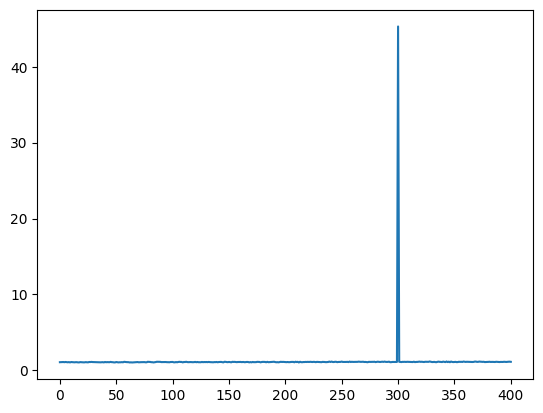

In [114]:
plt.plot(nb/wb)
